In [301]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/car price prediction/data/Data.zip" -d "/content/drive/MyDrive/Colab Notebooks/car price prediction/data/"

In [302]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import re

In [303]:
train_data = '/content/drive/MyDrive/Colab Notebooks/car price prediction/data/Participants_Data/Data_Train.xlsx'
test_data = '/content/drive/MyDrive/Colab Notebooks/car price prediction/data/Participants_Data/Data_Test.xlsx'
sample_sumbission = '/content/drive/MyDrive/Colab Notebooks/car price prediction/data/Participants_Data/Sample_Submission.xlsx'

In [304]:

train_df = pd.read_excel(train_data)

print("Column headings:")
print(train_df.columns)
train_df.head(5)


Column headings:
Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [305]:
test_df = pd.read_excel(test_data)

print("Column headings:")
print(test_df.columns)
test_df.head(5)

Column headings:
Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory'],
      dtype='object')


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [306]:
train_df.rename(columns={'Reviews': 'Ratings', 'Ratings': 'Reviews'}, inplace=True)
test_df.rename(columns={'Reviews': 'Ratings', 'Ratings': 'Reviews'}, inplace=True)

In [307]:
train_df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [308]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Ratings       6237 non-null   object 
 4   Reviews       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [309]:
train_df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


There's no missing values

In [310]:
# train_df = train_df.append(test_df)

In [311]:
train_df.shape

(6237, 9)

**Edition Column**


examples : 

Paperback,– 21 Dec 2016

Paperback,– 2014

Paperback,– Import, 1 Jul 2003

Paperback,– Import, Jul 2003

In [312]:
# Publication year and age of editions

train_df['year'] = train_df['Edition'].str[-4:]

# Random publication year for some books
train_df['year'] = train_df['year'].apply(lambda x: re.sub("[^0-9]", 'NA', x))
train_df['year'] = train_df['year'].apply(lambda x: x.replace('NA', '0'))
train_df['year'] = train_df['year'].astype(np.int16)

train_df['age'] = 2022 - train_df['year']

train_df.loc[(train_df['year'] == 0), 'year'] = np.NaN
avg_age = train_df['age'].mean()
train_df.loc[(train_df['year'].isnull()), 'age'] = avg_age

train_df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,year,age
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016.0,6.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012.0,10.0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982.0,40.0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017.0,5.0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006.0,16.0


In [313]:
train_df['Edition_1'] = train_df['Edition'].str.split(',').str[0]
train_df['Edition_2'] = train_df['Edition'].str.split(',').str[1]
train_df['Edition_2'] = train_df['Edition_2'].str.replace('– ','')

**Author Column**

Examples:

Ruskin Bond

Nirmal Jindal, Kamal Kumar

Maroof Raza, S.P. Cohen

S.P. Cohen

In [314]:
train_df['Author_1'] = train_df['Author'].str.split(',').str[0]
train_df['Author_2'] = train_df['Author'].str.split(',').str[1]

train_df['Author_1'] = train_df['Author_1'].fillna('missingAuthorName') 
train_df['Author_2'] = train_df['Author_2'].fillna('missingAuthorName') 

**Title Column**

Examples:

Ruskin Bond

Nirmal Jindal, Kamal Kumar

Maroof Raza, S.P. Cohen

S.P. Cohen

In [315]:
train_df['Title_1'] = train_df['Title'].str.extract(r"\((.*?)\)", expand=False) 
train_df['Title_1'] = train_df['Title_1'].fillna('missingTitle') 

**Ratings Column**

Example:

5.0 out of 5 stars

In [316]:
train_df['Ratings'] = train_df['Ratings'].apply(lambda x: x.split(' ')[0])
train_df['Ratings'] = train_df['Ratings'].astype(np.float16)


In [317]:
test_df['Ratings'] = test_df['Ratings'].apply(lambda x: x.split(' ')[0])
test_df['Ratings'] = test_df['Ratings'].astype(np.float16)


**Reviews Column**

Example:

29 customer reviews

In [318]:
train_df['Reviews'] = train_df['Reviews'].apply(lambda x: x.split(' ')[0])
train_df['Reviews'] = pd.to_numeric(train_df['Reviews'], errors='coerce')


In [319]:
test_df['Reviews'] = test_df['Reviews'].apply(lambda x: x.split(' ')[0])
test_df['Reviews'] = pd.to_numeric(test_df['Reviews'], errors='coerce')


**Synopsis Column**

Example:

summery of the book

In [320]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [321]:
!pip install textblob

In [322]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from textblob import TextBlob

In [323]:
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+["https",'t.co','...']
lemm= WordNetLemmatizer()
tweet_tok=  TweetTokenizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    tokens1 = [re.sub('^https://t.co/[\w]+','',tok) for tok in tokens]
    tokens2 = [re.sub('^@[\w]+','',tok) for tok in tokens1]
    tokens3 = [re.sub('^#[\w]+','',tok) for tok in tokens2]
    tokens4 = [re.sub('[0-9]+','',tok) for tok in tokens3]
    lemmed=[lemm.lemmatize(term) for term in tokens4 if term not in  stop_updated and term not in list(string.punctuation ) and len(term)>2]
    res=' '.join(lemmed)
    return res

In [324]:
train_df['Synopsis'] = train_df['Synopsis'].astype(str)
train_df['Synopsis']= train_df['Synopsis'].apply(clean_text)

In [325]:
def get_textblob_sentiment(sent):
    return TextBlob(sent).sentiment.polarity


train_df['Synopsis_sentiment']= train_df['Synopsis'].apply(get_textblob_sentiment)




**Genre Column**

Example:

Action & Adventure (Books)

Handicrafts, Decorative Arts & Crafts (Books)

Romance (Books)

In [326]:
train_df['Genre'] = train_df['Genre'].str.replace(r"\(.*\)","")

In [327]:
train_df['Genre_1'] = train_df['Genre'].str.split('&').str[0]
train_df['Genre_2'] = train_df['Genre'].str.split('&').str[1]

train_df['Genre_2'] = train_df['Genre_2'].fillna('missingBookGenre') 
train_df['Genre_1'] = train_df['Genre_1'].fillna('missingBookGenre') 

**BookCategory Column**

Example:

same as Genre but without (Books) written at the end

In [328]:
train_df['BookCategory_1'] = train_df['BookCategory'].str.split('&').str[0]
train_df['BookCategory_2'] = train_df['BookCategory_1'].str.split(',').str[0]
train_df['BookCategory_3'] = train_df['BookCategory_1'].str.split(',').str[1]
train_df['BookCategory_1'] = train_df['BookCategory'].str.split('&').str[1]

train_df['BookCategory_2'] = train_df['BookCategory_2'].fillna('missingBookCategory') 
train_df['BookCategory_3'] = train_df['BookCategory_3'].fillna('missingBookCategory') 
train_df['BookCategory_1'] = train_df['BookCategory_1'].fillna('missingBookCategory') 

**Price Column**

Example:

Just some float values

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


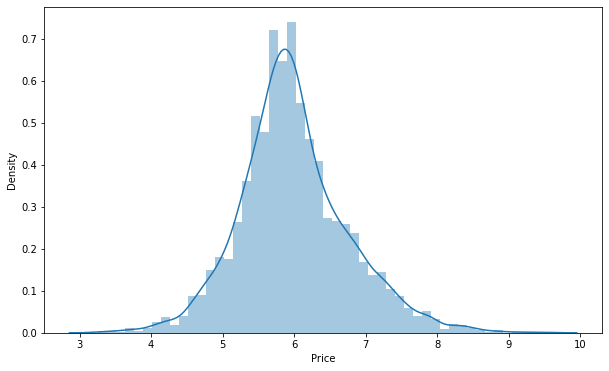

In [330]:
plt.figure(figsize=(10,6))
sns.distplot(np.log1p(train_df['Price']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


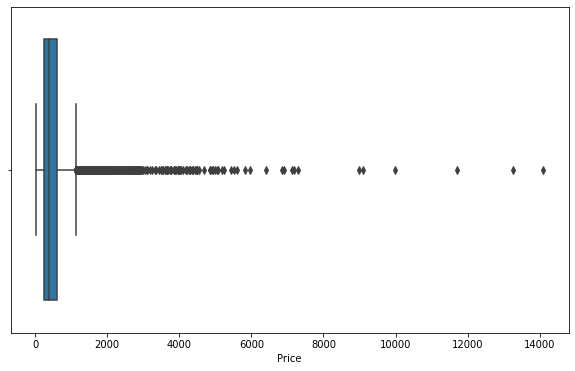

In [331]:
plt.figure(figsize=(10, 6))
sns.boxplot(train_df['Price'])

In [332]:


from scipy import stats
from scipy.stats import norm, skew #for some statistics


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


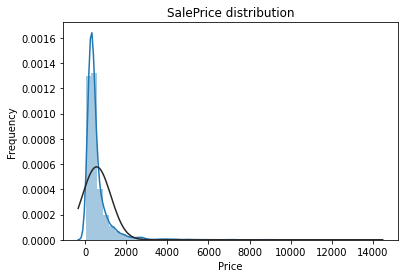

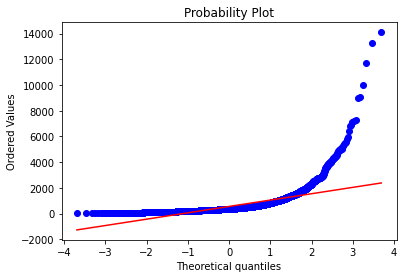

In [333]:
sns.distplot(train_df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['Price'], plot=plt)
plt.show()

In [334]:
drop_cols=['Title','Author','Edition','Synopsis','Genre', 'BookCategory']
train_df=train_df.drop(columns=drop_cols)

In [335]:
train_df.head()

,Ratings,Reviews,Price,year,age,Edition_1,Edition_2,Author_1,Author_2,Title_1,Synopsis_sentiment,Genre_1,Genre_2,BookCategory_1,BookCategory_2,BookCategory_3
0,4.000000,8.0,220.00,2016.0,6.0,Paperback,10 Mar 2016,Chris Kuzneski,missingAuthorName,The Hunters 3,0.208800,Action,Adventure,Adventure,Action,missingBookCategory
1,3.900391,14.0,202.93,2012.0,10.0,Paperback,7 Nov 2012,Arun Khopkar,missingAuthorName,missingTitle,0.110277,Cinema,Broadcast,True Accounts,Biographies,Diaries
2,4.800781,6.0,299.00,1982.0,40.0,Paperback,25 Feb 1982,Thomas Hobbes,missingAuthorName,Penguin Classics,0.144924,International Relations,missingBookGenre,missingBookCategory,Humour,missingBookCategory
3,4.101562,13.0,180.00,2017.0,5.0,Paperback,5 Oct 2017,Agatha Christie,missingAuthorName,Miss Marple,0.100000,Contemporary Fiction,missingBookGenre,Mystery,Crime,Thriller
4,5.000000,1.0,965.62,2006.0,16.0,Hardcover,10 Oct 2006,Editors of Life,missingAuthorName,missingTitle,0.356250,Photography Textbooks,missingBookGenre,Photography,Arts,Film


In [336]:
# Encode labels in column 'category'. 
train_df['Edition_1']= label_encoder.fit_transform(train_df['Edition_1']) 
train_df['Edition_1'].unique() 

array([12,  7, 11, 16,  6, 14, 10, 18, 13,  4,  5, 17,  2, 15,  9,  1,  8,
        0,  3])

In [337]:
# Encode labels in column 'category'. 
train_df['Edition_2']= label_encoder.fit_transform(train_df['Edition_2']) 
train_df['Edition_2'].unique() 

array([ 322, 2245, 1354, ..., 1169, 1482,  622])

In [338]:
# Encode labels in column 'category'. 
train_df['Author_1']= label_encoder.fit_transform(train_df['Author_1']) 
train_df['Author_1'].unique() 

array([ 607,  300, 3357, ..., 2900, 3408, 3179])

In [339]:
# Encode labels in column 'category'. 
train_df['Author_2']= label_encoder.fit_transform(train_df['Author_2']) 
train_df['Author_2'].unique() 

array([264,   8, 199,  23,  15, 241,  63, 233, 239, 249,  41, 248, 211,
       114,  85, 217, 152, 130, 258,  33,   0,  88,  31, 231,   6,  30,
        83, 253, 209, 262,  90,  50,  95, 243,  52,   1, 170,  75,  19,
       259,  51, 120,  79,  18, 183,  34, 163, 257, 141, 139, 188, 157,
         9,  44,  80,   2,  98, 222, 201, 193, 173, 145,  16,   7, 144,
       124, 118,  57,  22, 204, 177, 255, 244, 213, 185,  21, 263,  26,
       112,  12, 137, 194, 187, 191,  43, 245, 164,  37, 184, 190,  13,
       131, 160, 121,  78, 113, 179, 148,  56,  86,   5, 251,  24, 129,
       235, 104,  94,  55,  20,  54,  73, 237, 172, 133, 140,  28, 162,
       242, 260, 142, 151, 138,  60, 126, 192, 155, 122, 167,  48, 240,
        69,  35, 175,  92,  39, 206, 116, 228, 212, 117,  89,  66, 123,
       106, 261, 109, 127,  82, 224, 103,  64, 232,  70,  65, 135,  36,
       143,  84, 147, 214, 134, 132, 169,  47, 110,  38, 250, 219, 230,
       256,  74,  59,   4, 171, 254, 119, 200, 136, 198,  49,  4

In [340]:
# Encode labels in column 'category'. 
train_df['Title_1']= label_encoder.fit_transform(train_df['Title_1']) 
train_df['Title_1'].unique() 

array([801, 927, 612, 541, 645, 732, 765, 862, 236, 506, 694, 918, 874,
       903, 496, 113, 378, 624, 280,  58, 854, 697, 309, 877, 257, 848,
       593, 818, 212, 124, 558, 311, 316, 331, 104, 470,  44, 686, 600,
       825, 767, 608, 190, 813, 173, 474, 640, 391, 128, 448, 587, 204,
       880, 388, 568, 853, 579,   2, 170, 728, 564, 739,  81, 844, 375,
       476, 274, 805, 622, 200, 162, 553, 218, 300, 303, 730,  36, 458,
       733, 811, 245,  96, 130, 102, 153, 673, 126, 397, 133, 452, 333,
       144, 817, 408, 832, 836, 187, 740, 344, 293, 484, 368, 174, 830,
       755, 455, 412, 616, 592, 770,  21, 148, 641, 930, 544, 186, 109,
       615, 768,  54, 741, 855, 912, 603, 804, 282,  79, 723,  66, 590,
       135, 169, 628, 924, 497, 639, 584, 183, 847,  61,  64, 416, 775,
       731, 295, 578, 595, 149, 273, 708,  52, 594, 810, 772, 329, 414,
       570, 872, 783, 431, 692, 618, 656, 795, 165, 586,  97,  87,  68,
       682, 557, 776, 934, 349, 596, 705, 279, 763, 717, 265, 26

In [341]:
# Encode labels in column 'category'. 
train_df['Genre_1']= label_encoder.fit_transform(train_df['Genre_1']) 
train_df['Genre_1'].unique() 

array([  1,  73, 190,  90, 250, 159,  93, 307,  33,  25,  30,  81,  65,
       215,  22, 296, 150, 188,  92, 244, 288,  27, 279,  95, 195, 321,
       305,  83, 138, 207, 229, 243, 324, 210, 294, 183, 263, 219, 181,
       234,  75, 101,  85, 152,  23, 286, 175, 158, 184, 277, 205, 330,
       114, 178, 289, 117,  43, 176,  54, 160,  59, 258, 196,  60, 310,
       247, 108, 336,  41,  38, 285,  88, 179,  80,   5,  55, 161, 204,
       142, 275, 268,  68, 133,  16, 248, 217, 202, 335, 291, 155,  26,
       125, 312,  12, 140, 203, 255, 316, 227, 103,  76, 262, 172, 144,
       131,  56, 109, 317,  19, 174,  63, 192, 171, 132, 261,   8, 120,
        87, 137, 116,  17, 162,  86, 177, 329, 328,  58, 297, 314, 269,
       267, 264, 325,  49, 256, 339, 236, 146, 147, 154, 106, 167, 107,
        28, 126, 139, 191, 199, 298, 148,  91, 110,  57,  84, 218, 254,
       118, 304, 303,  66,  53,  11, 278, 228, 309, 223, 201,  10, 130,
       270, 211, 169, 115, 259,  34, 209, 323,  67, 322, 273,  3

In [342]:
# Encode labels in column 'category'. 
train_df['Genre_2']= label_encoder.fit_transform(train_df['Genre_2']) 
train_df['Genre_2'].unique() 

array([  1,   8, 106, 102,  57,  11,   4,   6,  51,  16,   9,  34,  98,
         7,  15,  10,  88,  36,  13,  52,  12,  84,  66,  90,   0,  72,
        18,  26,  63, 104,  91,  75,  48,  54,  89,  83,  55,  65,  68,
        92,  81, 100,  38,  80,  25,  21,  23,  17,  31,  24,  87,  47,
        77,  73,  59,  56, 105,  82,  85,  41,  28,  96,  37,   5,  61,
        74,  33,  49,  40,  93,  44,  78,  60,  27,  20,  29,  71,  45,
        19,  53,  76,  42,  50,  62,  64,  79,  14,   2,  95, 101,  35,
        67,  99,  70,  94,  43,  22,   3,  30, 103,  39,  86,  32,  58,
        97,  46,  69])

In [343]:
# Encode labels in column 'category'. 
train_df['BookCategory_1']= label_encoder.fit_transform(train_df['BookCategory_1']) 
train_df['BookCategory_1'].unique() 

array([0, 5, 7, 3, 4, 6, 1, 2])

In [344]:
# Encode labels in column 'category'. 
train_df['BookCategory_2']= label_encoder.fit_transform(train_df['BookCategory_2']) 
train_df['BookCategory_2'].unique() 

array([ 0,  2,  6,  5,  1, 10,  7,  4,  9,  3,  8])

In [345]:
# Encode labels in column 'category'. 
train_df['BookCategory_3']= label_encoder.fit_transform(train_df['BookCategory_3']) 
train_df['BookCategory_3'].unique() 

array([5, 0, 4, 1, 3, 2])

In [346]:
train_df.head()

,Ratings,Reviews,Price,year,age,Edition_1,Edition_2,Author_1,Author_2,Title_1,Synopsis_sentiment,Genre_1,Genre_2,BookCategory_1,BookCategory_2,BookCategory_3
0,4.000000,8.0,220.00,2016.0,6.0,12,322,607,264,801,0.208800,1,1,0,0,5
1,3.900391,14.0,202.93,2012.0,10.0,12,2245,300,264,927,0.110277,73,8,5,2,0
2,4.800781,6.0,299.00,1982.0,40.0,12,1354,3357,264,612,0.144924,190,106,7,6,5
3,4.101562,13.0,180.00,2017.0,5.0,12,2084,58,264,541,0.100000,90,106,3,5,4
4,5.000000,1.0,965.62,2006.0,16.0,7,341,942,264,927,0.356250,250,106,4,1,1


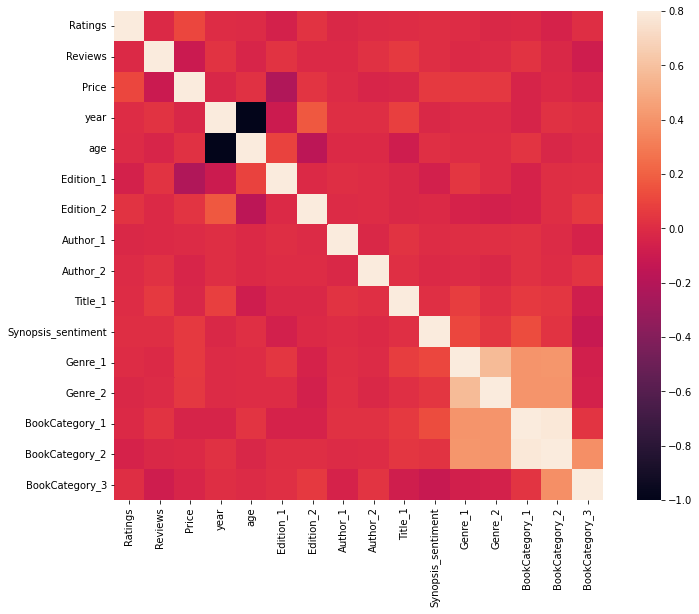

In [347]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [354]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BookCategory_3,0,0.0
BookCategory_2,0,0.0
BookCategory_1,0,0.0
Genre_2,0,0.0
Genre_1,0,0.0
Synopsis_sentiment,0,0.0
Title_1,0,0.0
Author_2,0,0.0
Author_1,0,0.0
Edition_2,0,0.0


In [349]:
train_df = train_df.fillna(train_df.mean())

In [355]:

X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [373]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4677, 15), (4677,), (1560, 15), (1560,))

In [356]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [357]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [374]:
import lightgbm as lgb
y_cv=np.nan_to_num(y_cv, posinf=0, neginf=0) 
X_train=np.nan_to_num(X_train, posinf=0, neginf=0) 
y_train=np.nan_to_num(y_train, posinf=0, neginf=0) 
X_cv=np.nan_to_num(X_cv, posinf=0, neginf=0) 

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 3500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)

y_pred_lgbm=np.nan_to_num(y_pred_lgbm, posinf=0) 
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 590.833
[200]	valid_0's rmse: 573.269
[300]	valid_0's rmse: 566.643
[400]	valid_0's rmse: 563.151
[500]	valid_0's rmse: 561.675
[600]	valid_0's rmse: 560.81
[700]	valid_0's rmse: 560.51
[800]	valid_0's rmse: 561.164
[900]	valid_0's rmse: 562.365
Early stopping, best iteration is:
[701]	valid_0's rmse: 560.457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in expm1


ValueError: ignored

In [367]:
np.any(np.isnan(y_pred_lgbm))

False

In [368]:
np.all(np.isfinite(y_pred_lgbm))

True